<a href="https://colab.research.google.com/github/dTony33/KDD20-tutorial/blob/master/Data_Science_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import os
#os.environ['KAGGLE_USERNAME'] = "dtony33" # username from the json file
#os.environ['KAGGLE_KEY'] = "e86a6da2049059af2fbd3cb1e982315c" # key from the json file
#!kaggle datasets download -d tunguz/big-five-personality-test/download # api copied from kaggle


In [2]:
#!unzip /content/big-five-personality-test.zip
#data  = pd.read_csv('/content/IPIP-FFM-data-8Nov2018/data-final.csv')

In [3]:
import pandas as pd
data = pd.read_csv('/content/data-final.csv', sep = '\t')

#Data Preprocessing


This dataset contains personal rating of each individual along with some time lapse taken by the individual. We gonna consider only rating by the individual and drop remaining columns. Without altering the original data, we are copying it into different variable called 'df'

In [4]:
data.head
df  = data.copy()
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,...,1655.0,1937.0,1233.0,3151.0,2576.0,1888.0,2815.0,2964.0,2665.0,2888.0,3008.0,2367.0,2504.0,2544.0,2144.0,4784.0,3529.0,5072.0,2016.0,3353.0,2649.0,3544.0,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,...,2422.0,1448.0,3216.0,6160.0,2208.0,1513.0,2785.0,3833.0,3280.0,1184.0,2096.0,1880.0,3209.0,1744.0,4392.0,1943.0,2263.0,1559.0,1304.0,2176.0,2560.0,6632.0,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1

Since we dont need the lapse columns and extra columns other than rating, we gonna drop them and  we need country column. It resides at 108 index of a column so we delete till 107 and remove everything from country

In [5]:
df.drop(df.columns[50:107], axis= 1, inplace = True)
df.drop(df.columns[51:], axis= 1, inplace = True)  #NOTE: Dont run this command more than once, restart the session everytime if you want to run this cell

In [6]:
df 

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


#Explotary Data Analysis

First we need to find out missing and nan values and drop them

In [7]:
df.isnull().values.sum()

89227

Total number of missing values are 89211. Drop them and find total number of participants

In [8]:
df.dropna(inplace =True)

In [9]:
len(df)

1013481

Above value is total number of participants


#Outliers
removing outliers can be of different types. Here I sued zscore outlier method to remove them. Formula for  Zscore is mena(+-)threshold * standard deviation. Threshold limit can be anything,I have set for 33% which is (+-)3

In [10]:
import numpy as np
def cap_data(df):
    for col in df.columns:
        #print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
          mean = df[col].mean()
          std = df[col].std()
          thr = 3
          upper_bound = mean + thr*std
          lower_bound = mean - thr*std
          df[col] = np.where(df[col]>upper_bound,upper_bound, np.where(df[col]<lower_bound,lower_bound,df[col]))
          
    return df

final_df=cap_data(df)

In [11]:
final_df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


The following items were presented on one page and each was rated on a five point scale using radio buttons. 
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

EXT1	I am the life of the party.
EXT2	I don't talk a lot.
EXT3	I feel comfortable around people.
EXT4	I keep in the background.
EXT5	I start conversations.
EXT6	I have little to say.
EXT7	I talk to a lot of different people at parties.
EXT8	I don't like to draw attention to myself.
EXT9	I don't mind being the center of attention.
EXT10	I am quiet around strangers.
EST1	I get stressed out easily.
EST2	I am relaxed most of the time.
EST3	I worry about things.
EST4	I seldom feel blue.
EST5	I am easily disturbed.
EST6	I get upset easily.
EST7	I change my mood a lot.
EST8	I have frequent mood swings.
EST9	I get irritated easily.
EST10	I often feel blue.
AGR1	I feel little concern for others.
AGR2	I am interested in people.
AGR3	I insult people.
AGR4	I sympathize with others' feelings.
AGR5	I am not interested in other people's problems.
AGR6	I have a soft heart.
AGR7	I am not really interested in others.
AGR8	I take time out for others.
AGR9	I feel others' emotions.
AGR10	I make people feel at ease.
CSN1	I am always prepared.
CSN2	I leave my belongings around.
CSN3	I pay attention to details.
CSN4	I make a mess of things.
CSN5	I get chores done right away.
CSN6	I often forget to put things back in their proper place.
CSN7	I like order.
CSN8	I shirk my duties.
CSN9	I follow a schedule.
CSN10	I am exacting in my work.
OPN1	I have a rich vocabulary.
OPN2	I have difficulty understanding abstract ideas.
OPN3	I have a vivid imagination.
OPN4	I am not interested in abstract ideas.
OPN5	I have excellent ideas.
OPN6	I do not have a good imagination.
OPN7	I am quick to understand things.
OPN8	I use difficult words.
OPN9	I spend time reflecting on things.
OPN10	I am full of ideas.


In [12]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}


Extroversion_Personality = [column for column in data if column.startswith('EXT')]
Neuroticism_Personality = [column for column in data if column.startswith('EST')]
Agreeable_Personality = [column for column in data if column.startswith('AGR')]
Conscientious_Personality = [column for column in data if column.startswith('CSN')]
Open_Personality = [column for column in data if column.startswith('OPN')]

In [13]:
import matplotlib.pyplot as plt
def images(personality,questions):
  plt.figure(figsize=(40,60))
  for i in range(0, len(questions)):
    plt.subplot(10,3,i+1)
    plt.hist(final_df[personality[i]], bins=20, color='red', alpha=.5)
    plt.title(questions[personality[i]], fontsize=38)


Visualisation for Extroversion_Personality

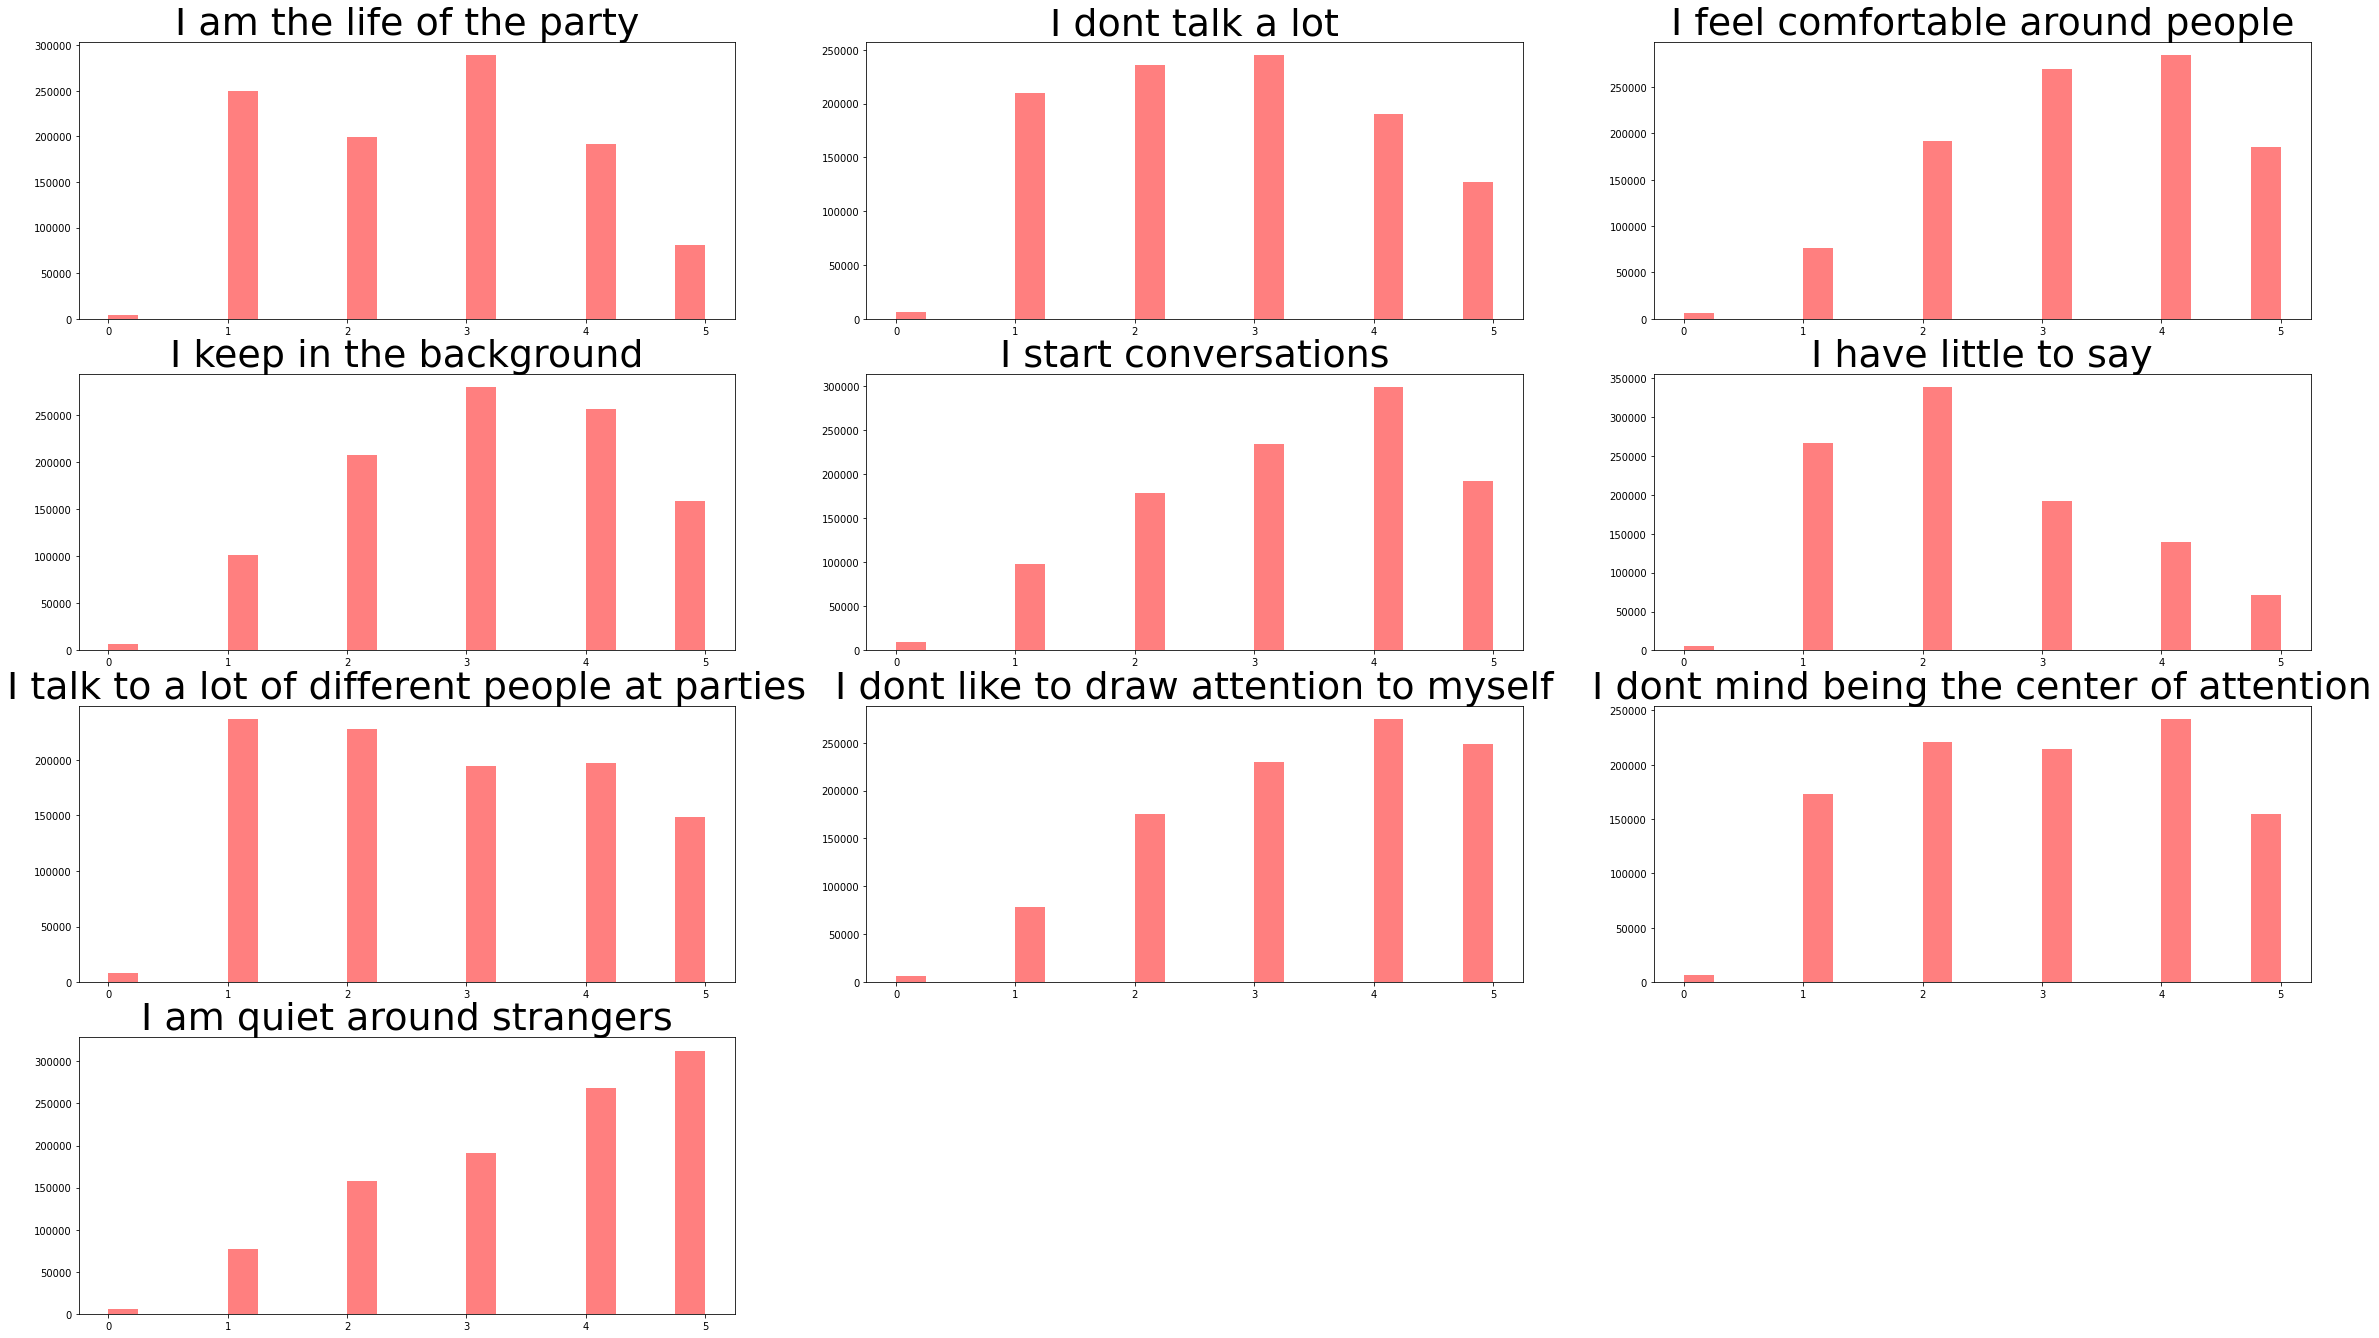

In [14]:
images(Extroversion_Personality, ext_questions)

Visualisastion of Neuroticism_Personality

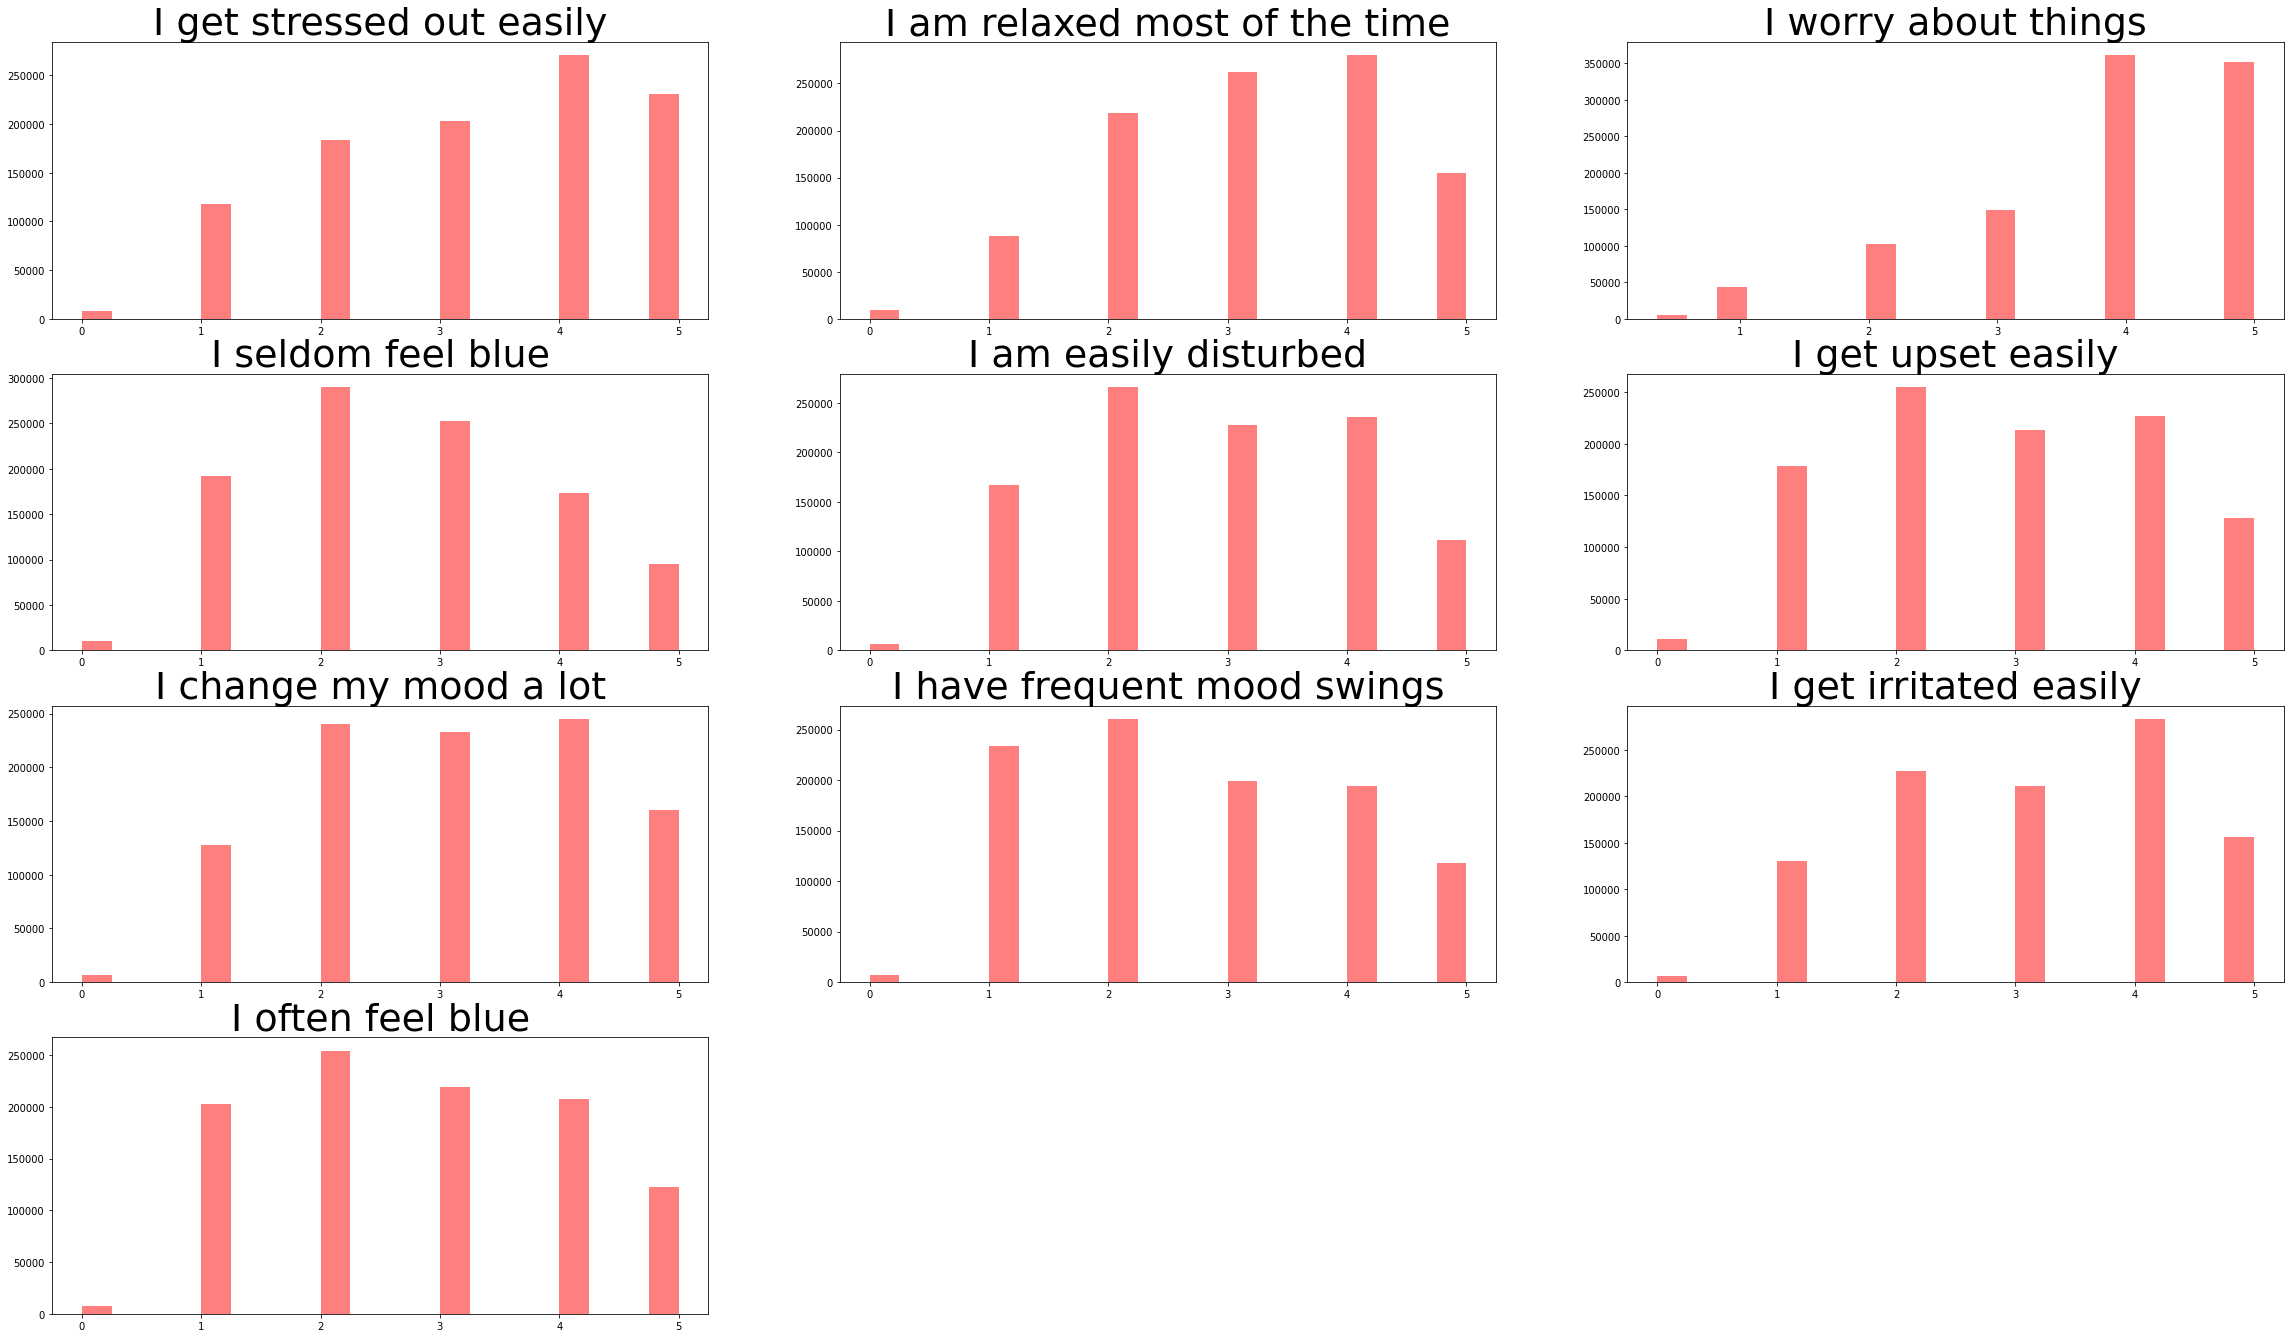

In [15]:
images(Neuroticism_Personality, est_questions)

Visualisation of Agreeable_Personality

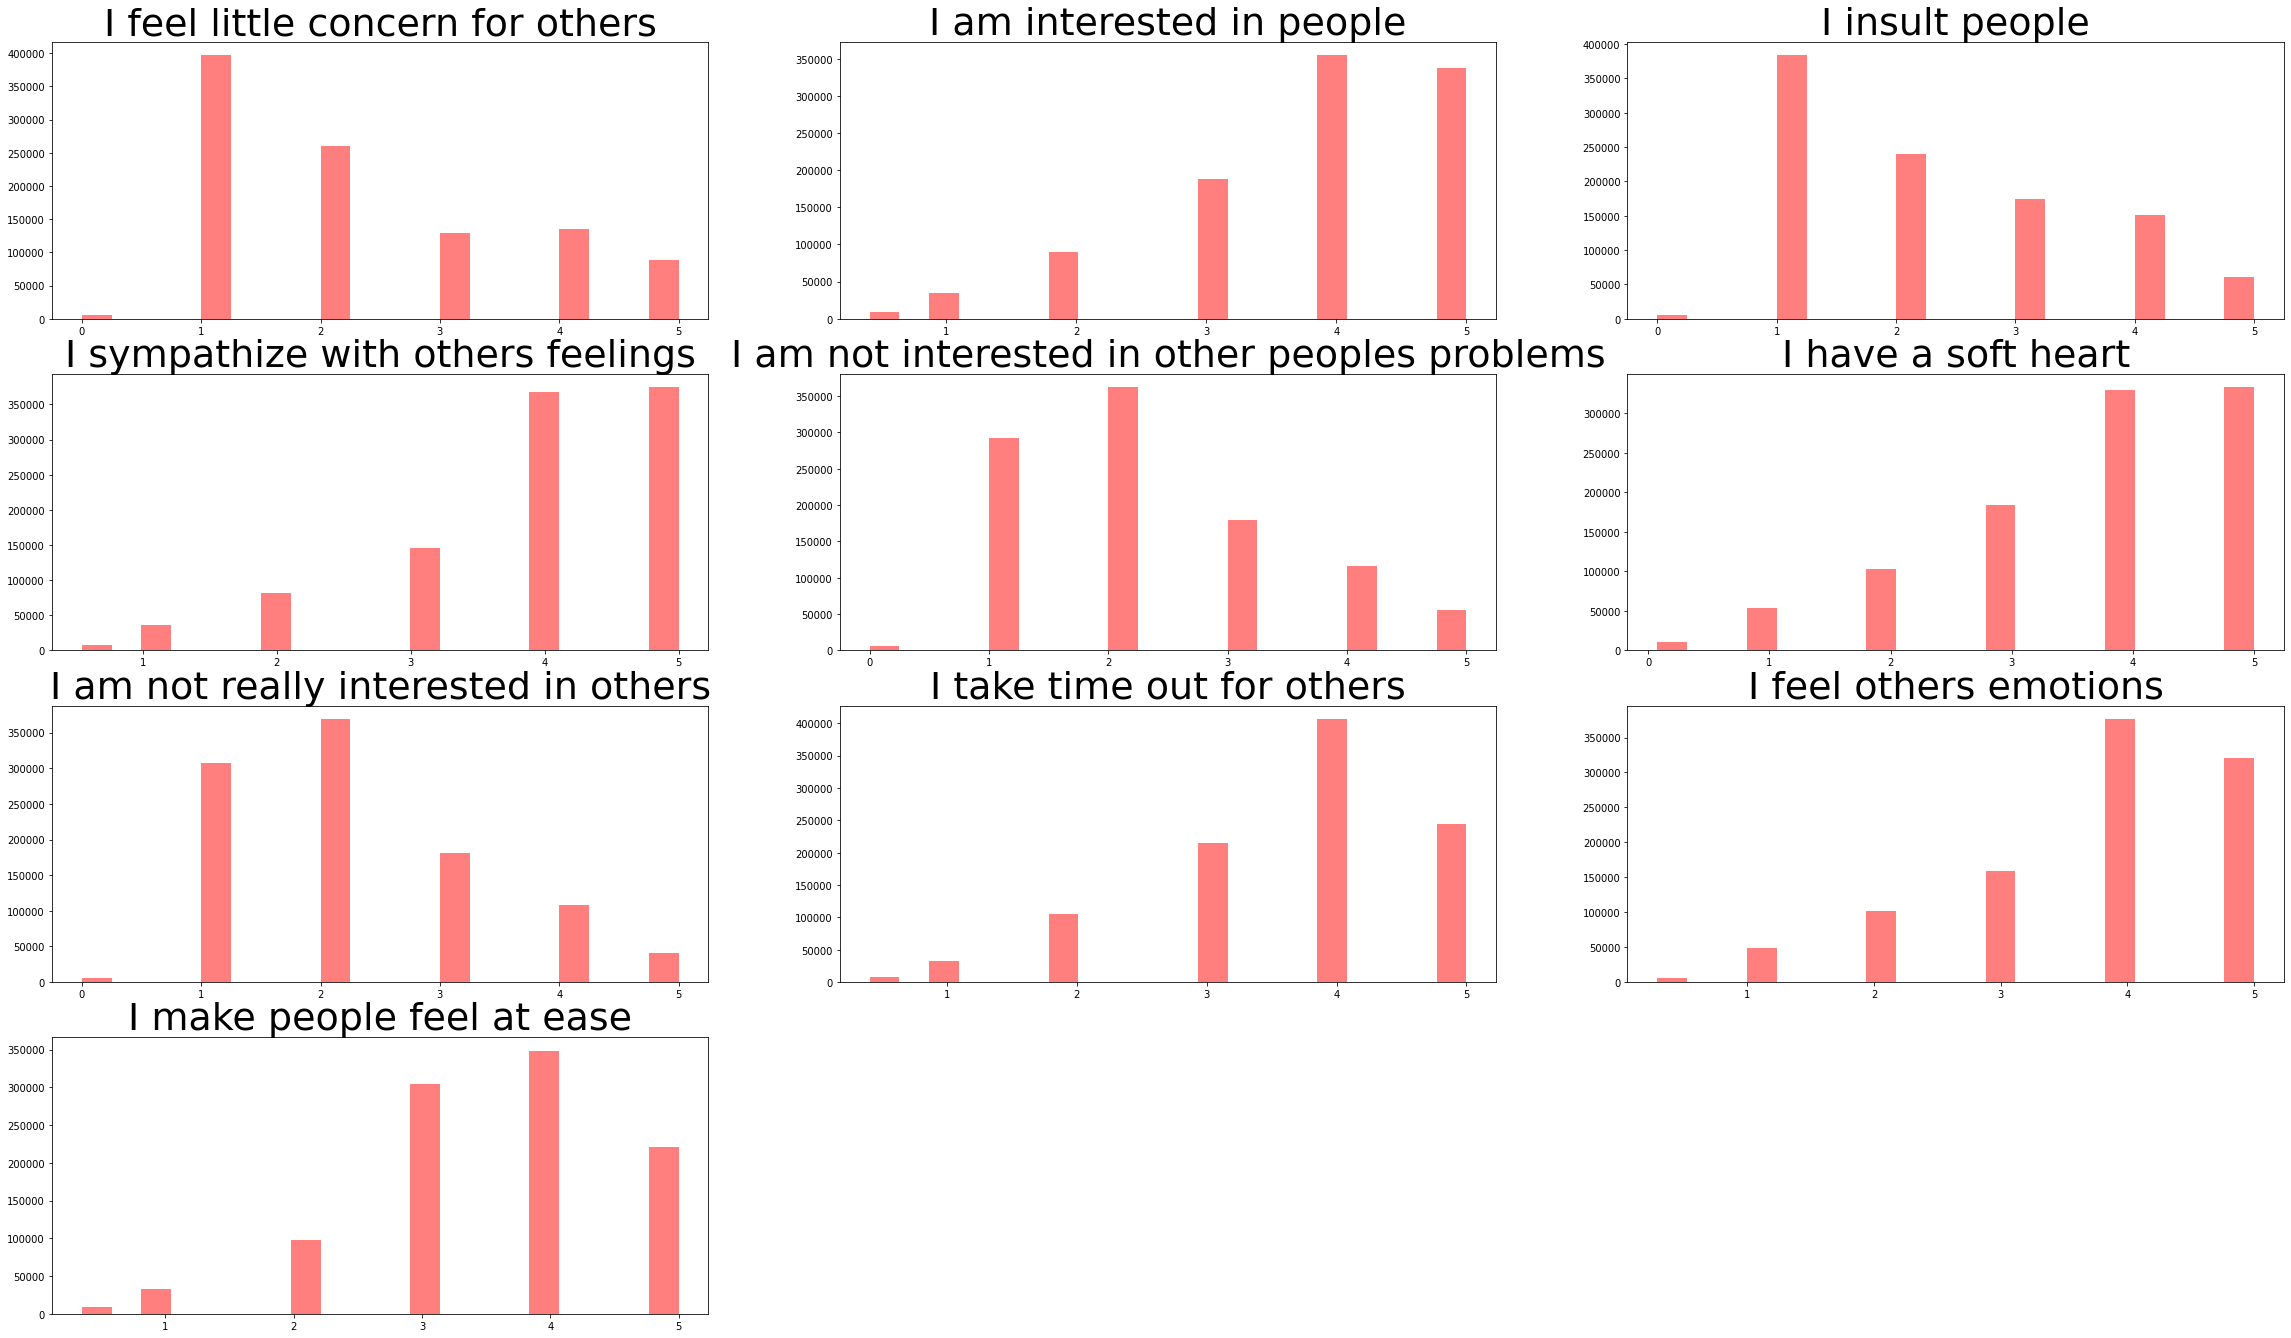

In [16]:
images(Agreeable_Personality, agr_questions)

Visualisation of Conscientious_Personality


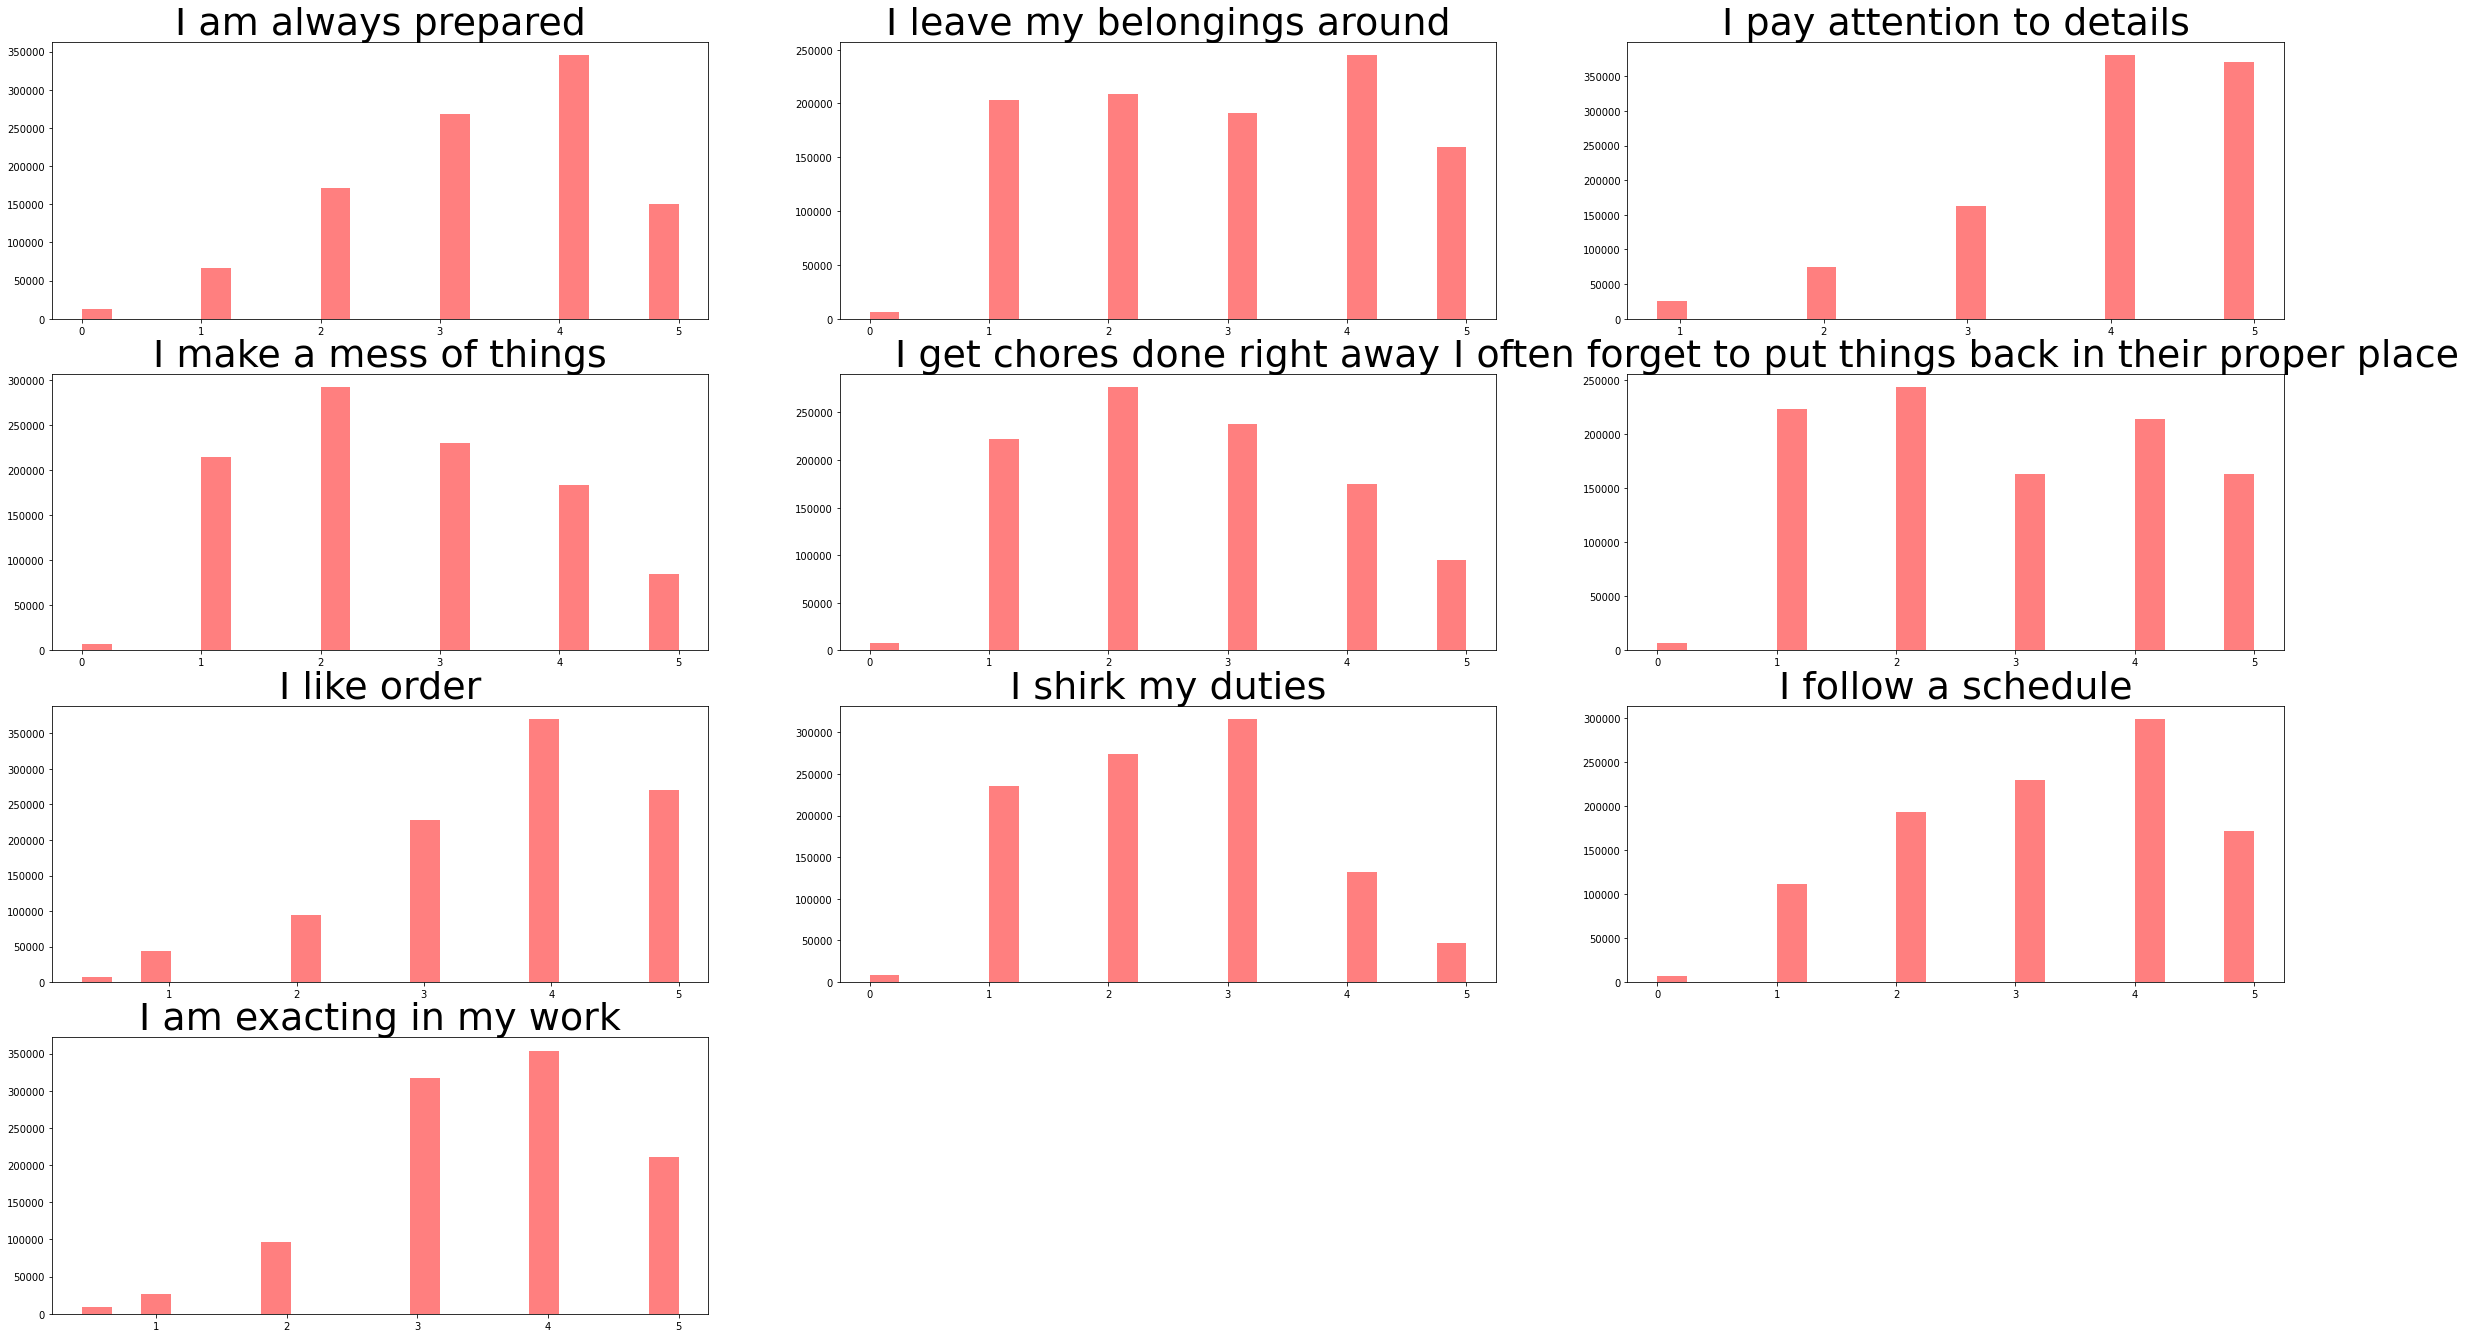

In [17]:
images(Conscientious_Personality,csn_questions)

Visualisation of Open Personality

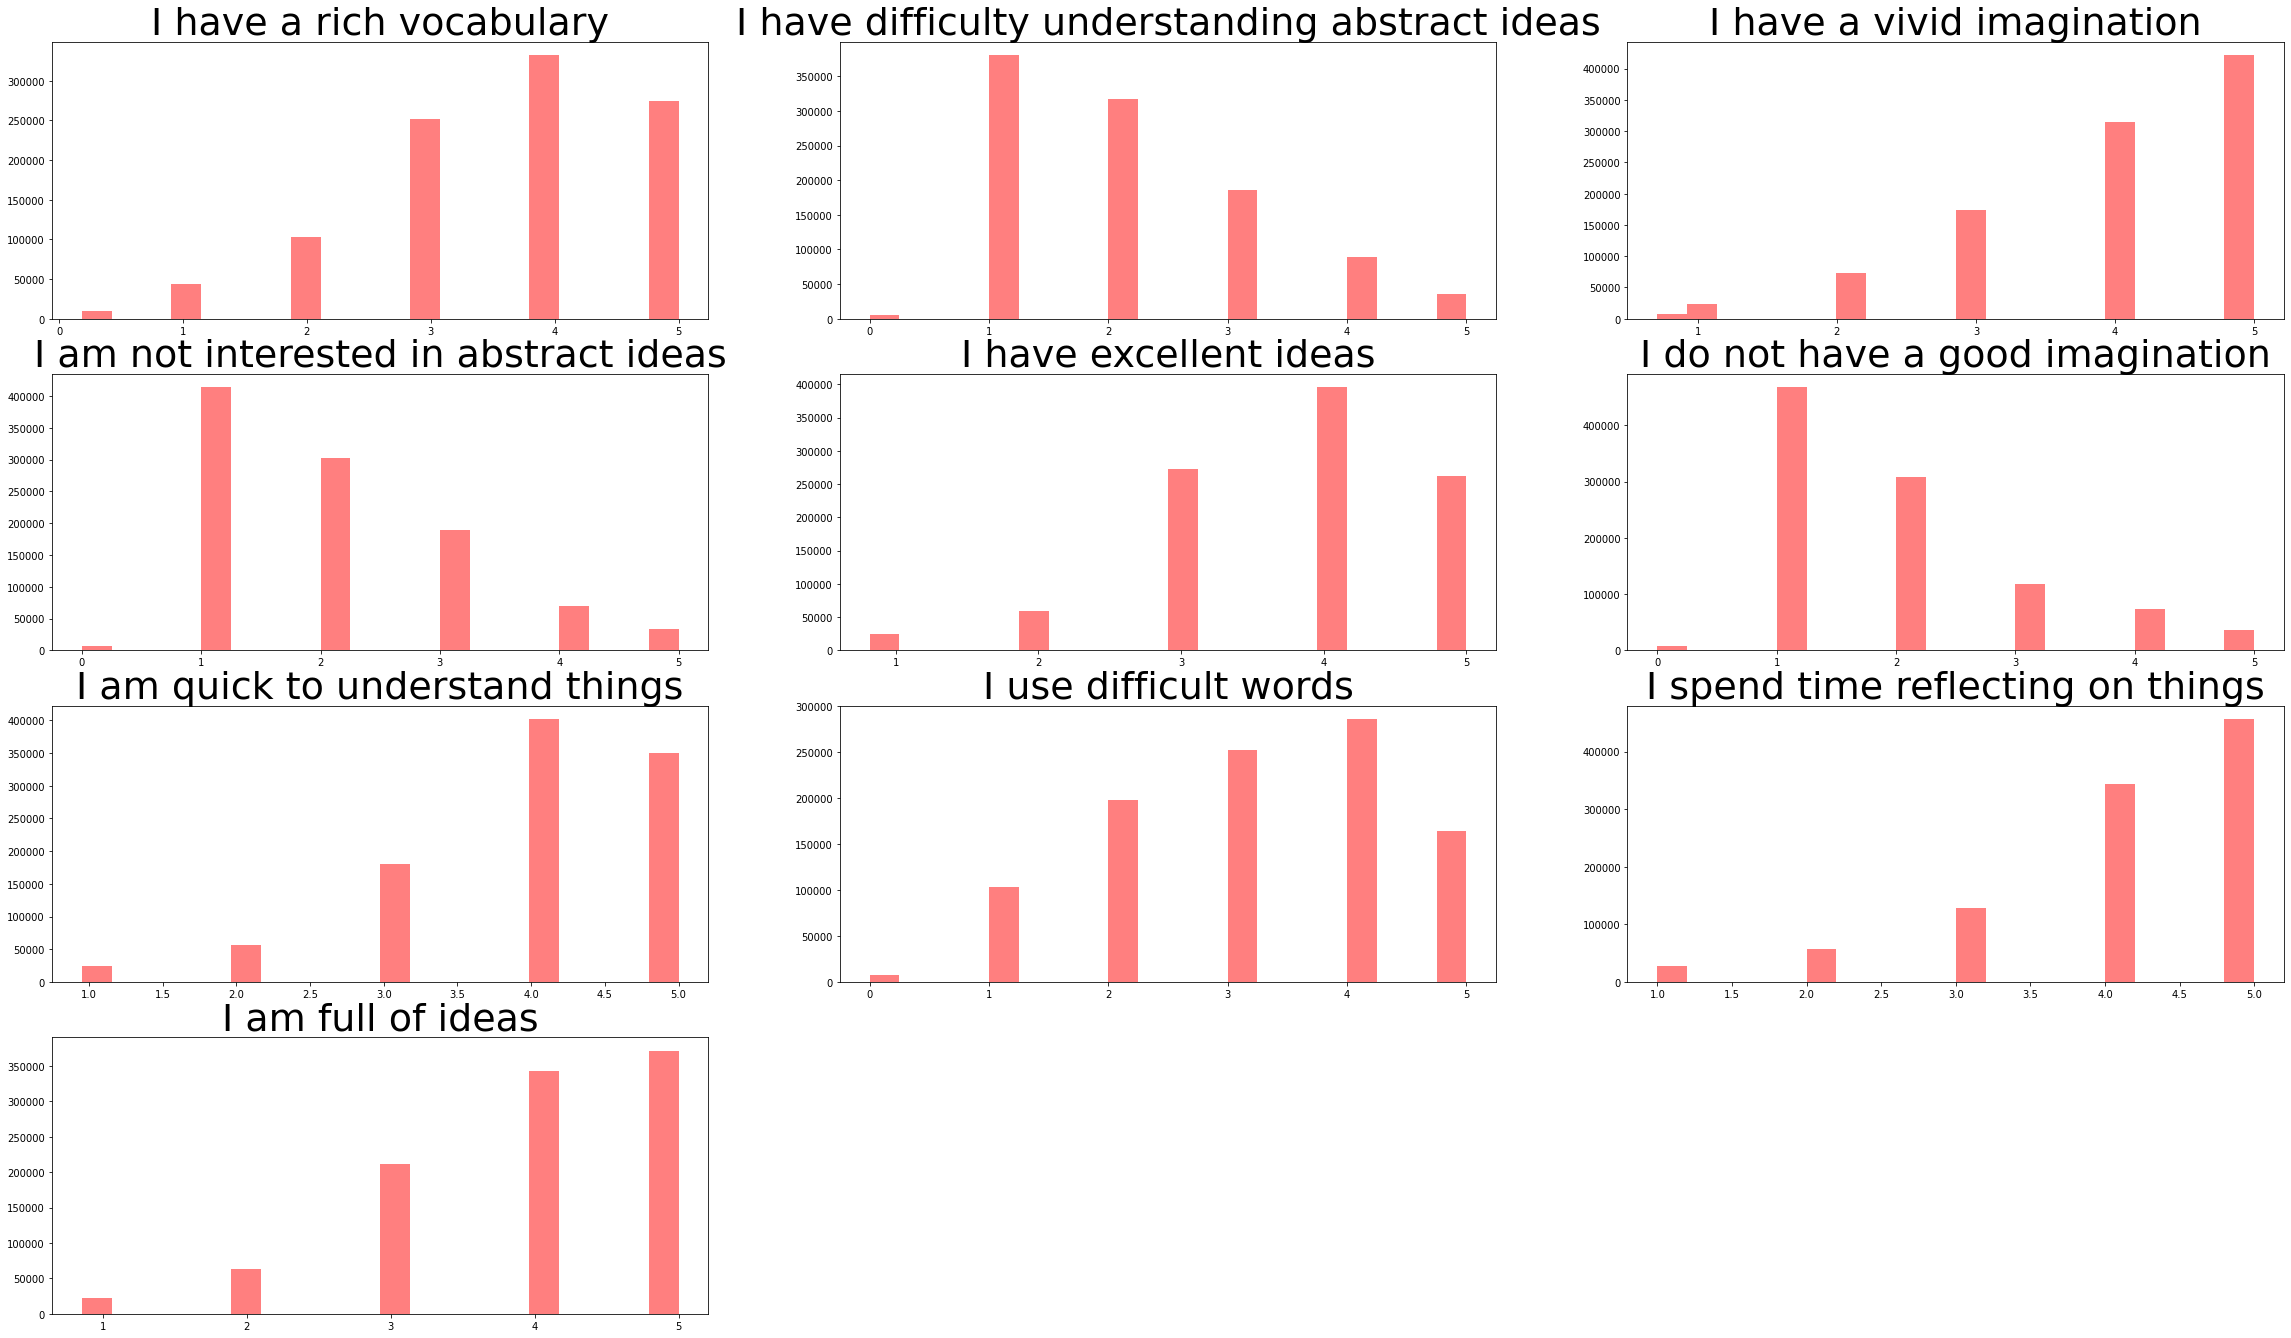

In [18]:
images(Open_Personality,opn_questions)

Deleting countries row for clustering technique


In [19]:
df = df.drop('country', axis =1)

For any clustering technique we need to scale each feature because in clustering we calculate distance between the data. If scaling is not done some data points seems to be dominating on other. Here we are using Max Abs Scaling. This method will scale and translate the data with maximum absolute value of 1.0. while not shifting the data or center of the data and by that not destroying the sparsity of data. Max Abs Scaling will withstand outliers also.

In [20]:
from sklearn.preprocessing import MaxAbsScaler
scalar = MaxAbsScaler()
cols = list(df.columns)
df = pd.DataFrame(scalar.fit_transform(df), columns= cols)
df_sample = df[:10000]
df_kmeans = df_sample.copy()

In [21]:
df_sample

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,1.0,0.4,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.8,0.8,0.4,0.8,0.800000,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,0.4,0.6,0.8,0.2,0.6,0.2,0.4,0.2,0.6,0.2,0.2,0.8,0.2,1.0,0.2,1.0,0.6,0.8,1.0,0.6,0.6,0.4,1.0,0.6,0.6,0.2,0.6,0.6,1.0,0.600000,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,0.6,0.2,0.8,0.2,0.8,0.4,0.8,0.2,0.8,0.8,0.6,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.4,0.8,0.400000,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,0.6,0.6,0.6,0.4,0.6,0.4,0.4,0.4,0.8,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.2,0.4,0.4,0.6,0.2,0.800000,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,0.2,1.0,1.0,0.6,0.2,0.2,0.2,0.2,0.6,0.4,0.2,1.0,0.2,1.0,0.2,0.6,0.2,1.0,1.0,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.2,1.0,1.000000,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.8,0.6,0.8,0.8,0.4,1.0,0.4,0.4,0.8,0.8,0.4,0.8,0.8,0.2,0.8,0.4,0.8,0.4,0.6,0.4,0.6,0.8,0.6,0.6,0.4,0.8,0.6,0.4,0.4,0.6,0.8,0.8,0.400000,0.8,0.2,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.8
9996,0.2,0.2,0.6,0.8,0.4,0.8,0.2,0.8,0.2,0.8,0.4,0.4,0.6,0.6,0.4,0.2,0.6,0.4,0.6,0.4,1.0,0.6,0.8,0.6,0.6,0.6,0.6,0.6,0.4,0.4,0.6,0.4,1.0,0.4,0.4,0.4,0.4,0.4,0.4,0.400000,1.0,0.2,1.0,0.4,0.8,0.2,1.0,0.8,0.8,0.8
9997,0.8,0.2,1.0,0.6,1.0,0.2,0.8,0.4,0.8,0.6,0.2,1.0,1.0,0.6,1.0,0.4,0.2,0.4,0.4,0.4,0.8,1.0,0.8,1.0,0.2,1.0,0.2,0.8,0.8,0.8,0.8,0.2,1.0,0.2,0.6,0.2,0.2,0.4,0.8,0.600000,0.2,0.2,1.0,0.2,0.6,0.6,0.4,0.4,0.8,0.6
9998,0.2,0.4,0.2,0.8,0.8,0.4,0.2,0.8,0.6,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,0.8,1.0,0.2,1.0,0.8,0.4,1.0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,1.0,0.2,1.000000,0.8,0.4,1.0,0.6,1.0,0.4,0.2,1.0,1.0,1.0


#Clustering

We gonna perform clustering in 2 ways


1.   Hierarchical Clustering
2.   K-Means Clustering

#** Hierarchical Clusstering**:  It is a distance based algorithm.
This method will automatically divide data into number of clusters given the advantage over K-means clustering in which we need to predefine the number of clusters. 

In Hierarchical clusterings custers will be found out through distance calculating measure like euclidean method.

Now we gonna plot a dendogram where it finds out number of clusters automatically



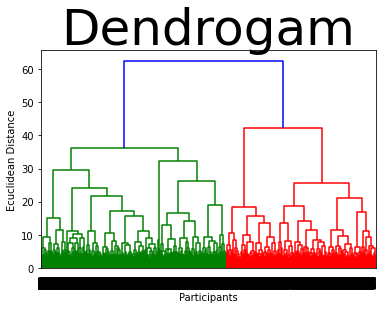

In [22]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_sample, method = 'ward'))
plt.title('Dendrogam', fontsize = 50)
plt.xlabel('Participants')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
x = df_sample
hc.fit_predict(x)

df_sample['Clusters'] = hc.labels_
df_sample[300:500]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
300,0.8,0.4,0.8,0.8,0.8,0.4,0.8,1.0,0.2,1.0,0.4,1.0,0.2,0.8,0.2,0.2,0.2,0.2,1.0,0.8,1.0,0.8,0.8,0.4,0.4,1.0,0.4,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.2,0.8,1.0,0.2,0.8,0.8,0.6,0.4,1.0,0.2,0.8,0.2,1.0,0.4,1.0,1.0,3
301,0.4,0.8,0.8,1.0,0.8,0.6,0.4,0.8,0.4,0.8,0.6,0.8,0.8,0.4,0.8,0.6,0.8,0.8,0.8,0.8,0.6,0.8,0.8,0.8,0.6,0.8,0.4,0.6,0.6,0.6,0.6,0.6,0.8,0.8,0.4,0.6,0.6,0.8,0.6,0.6,0.6,0.6,1.0,0.6,1.0,0.2,0.6,0.6,1.0,0.8,0
302,0.6,0.2,1.0,0.4,1.0,0.2,1.0,0.4,1.0,0.2,1.0,0.8,0.8,0.6,1.0,1.0,1.0,1.0,0.6,0.6,0.2,1.0,0.2,1.0,0.2,1.0,0.2,0.8,1.0,1.0,0.8,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.2,0.6,1.0,0.2,0.8,0.2,0.8,0.2,0.8,0.6,1.0,0.8,2
303,0.8,0.4,0.8,0.6,1.0,0.2,1.0,0.2,0.4,0.2,0.2,1.0,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,1.0,0.4,0.8,0.2,0.8,0.2,0.6,0.6,0.8,0.8,0.8,0.8,0.4,0.4,0.6,0.4,0.6,0.4,0.6,0.8,0.2,0.8,0.2,0.6,0.4,0.8,0.6,0.8,0.8,3
304,0.6,0.2,0.4,0.8,0.6,0.2,0.2,0.6,0.6,1.0,1.0,0.2,1.0,0.2,0.6,0.8,0.8,0.8,0.8,1.0,0.2,0.4,0.8,1.0,0.4,1.0,0.2,0.8,1.0,1.0,0.4,0.8,0.6,0.8,0.2,0.8,0.6,0.6,0.4,0.4,1.0,1.0,1.0,0.2,0.6,0.2,0.4,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,0.2,1.0,0.2,1.0,0.4,1.0,0.4,0.8,0.4,0.8,0.6,0.8,0.6,0.4,0.6,0.8,0.6,0.8,0.4,0.4,1.0,0.4,0.8,0.4,0.4,0.2,0.8,0.8,1.0,0.6,0.8,0.8,0.6,0.4,0.8,0.6,0.4,0.4,0.8,1.0,0.2,0.8,0.2,0.8,0.4,1.0,0.6,0.8,0.8,2
496,0.2,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.2,1.0,1.0,0.2,1.0,0.4,1.0,0.6,0.8,0.6,1.0,0.6,0.4,0.2,0.6,1.0,0.8,0.8,0.4,0.6,0.6,0.6,0.2,0.2,0.4,0.8,0.4,0.4,0.6,0.8,0.6,0.2,0.2,0.6,0.6,0.6,0.2,0.4,0.6,0.2,0.8,0.2,0
497,0.6,0.2,0.6,0.4,0.4,0.2,0.4,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.2,0.6,1.0,0.8,0.8,0.8,0.8,0.4,0.8,0.4,1.0,0.2,0.8,0.6,0.2,0.8,0.6,0.8,0.4,0.8,0.4,1.0,1.0,0.8,0.2,0.4,0.6,0.4,1.0,0.2,0.8,0.4,0.8,0.6,1.0,0.8,0
498,0.2,0.6,0.8,0.8,0.8,0.4,0.2,0.8,0.4,0.6,1.0,0.8,0.8,0.4,0.4,1.0,0.6,0.6,1.0,0.8,0.4,0.8,0.4,0.6,1.0,0.6,0.2,1.0,0.6,0.4,0.4,0.4,1.0,0.6,0.4,0.4,0.8,0.6,0.8,0.6,0.8,1.0,0.8,0.8,0.8,0.4,0.8,0.8,0.8,1.0,1


Added all the cluster values as predictions to the end of the table. It's clusters starts from 0 to 4, total of 5 predictions which describes the personality of a person based on his answers given. Personality traits of a person is as follows


0 --- Extroversion_Personality 
1 --- Neuroticism_Personality 
2 --- Agreeable_Personality 
3 --- Conscientious_Personality 
4 --- Open_Personality

In [27]:
df_sample.Clusters.value_counts()

0    3498
3    2945
1    2009
2    1506
4      42
Name: Clusters, dtype: int64

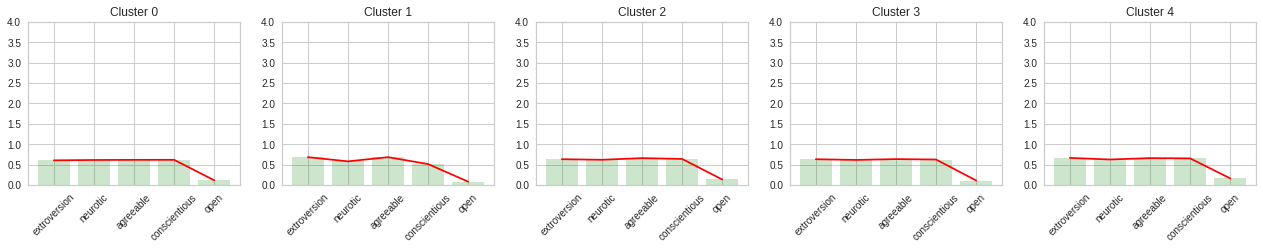

In [31]:
col_list = list(df_sample)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_sample[ext].sum(axis=1)/10
data_sums['neurotic'] = df_sample[est].sum(axis=1)/10
data_sums['agreeable'] = df_sample[agr].sum(axis=1)/10
data_sums['conscientious'] = df_sample[csn].sum(axis=1)/10
data_sums['open'] = df_sample[opn].sum(axis=1)/10
data_sums['clusters'] = hc.labels_
data_sums.groupby('clusters').mean()

dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)


**K-Means Clustering**

we need to predefine the clusters and method to find the centroids of the clusters which is Euclidean Distance. 

1st we gonna visualize the elbow method

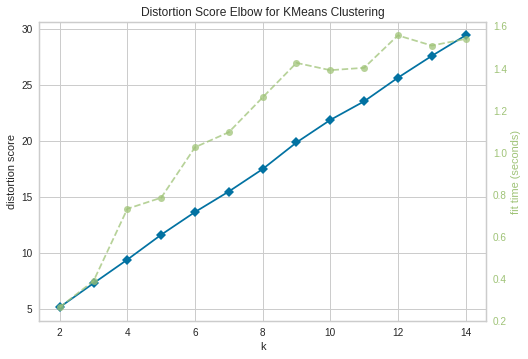

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_kmeans[:5000])
visualizer.poof()

Clustering participants into 5 clusters


In [26]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_kmeans)
predictions = k_fit.labels_
df_kmeans['Clusters'] = predictions
df_kmeans

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,1.0,0.4,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.8,0.8,0.4,0.8,0.800000,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0,4
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,0.4,0.6,0.8,0.2,0.6,0.2,0.4,0.2,0.6,0.2,0.2,0.8,0.2,1.0,0.2,1.0,0.6,0.8,1.0,0.6,0.6,0.4,1.0,0.6,0.6,0.2,0.6,0.6,1.0,0.600000,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6,1
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,0.6,0.2,0.8,0.2,0.8,0.4,0.8,0.2,0.8,0.8,0.6,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.4,0.8,0.400000,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8,1
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,0.6,0.6,0.6,0.4,0.6,0.4,0.4,0.4,0.8,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.2,0.4,0.4,0.6,0.2,0.800000,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6,0
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,0.2,1.0,1.0,0.6,0.2,0.2,0.2,0.2,0.6,0.4,0.2,1.0,0.2,1.0,0.2,0.6,0.2,1.0,1.0,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.2,1.0,1.000000,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.8,0.6,0.8,0.8,0.4,1.0,0.4,0.4,0.8,0.8,0.4,0.8,0.8,0.2,0.8,0.4,0.8,0.4,0.6,0.4,0.6,0.8,0.6,0.6,0.4,0.8,0.6,0.4,0.4,0.6,0.8,0.8,0.400000,0.8,0.2,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.8,3
9996,0.2,0.2,0.6,0.8,0.4,0.8,0.2,0.8,0.2,0.8,0.4,0.4,0.6,0.6,0.4,0.2,0.6,0.4,0.6,0.4,1.0,0.6,0.8,0.6,0.6,0.6,0.6,0.6,0.4,0.4,0.6,0.4,1.0,0.4,0.4,0.4,0.4,0.4,0.4,0.400000,1.0,0.2,1.0,0.4,0.8,0.2,1.0,0.8,0.8,0.8,0
9997,0.8,0.2,1.0,0.6,1.0,0.2,0.8,0.4,0.8,0.6,0.2,1.0,1.0,0.6,1.0,0.4,0.2,0.4,0.4,0.4,0.8,1.0,0.8,1.0,0.2,1.0,0.2,0.8,0.8,0.8,0.8,0.2,1.0,0.2,0.6,0.2,0.2,0.4,0.8,0.600000,0.2,0.2,1.0,0.2,0.6,0.6,0.4,0.4,0.8,0.6,4
9998,0.2,0.4,0.2,0.8,0.8,0.4,0.2,0.8,0.6,1.0,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,0.8,1.0,0.2,1.0,0.8,0.4,1.0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,1.0,0.2,1.000000,0.8,0.4,1.0,0.6,1.0,0.4,0.2,1.0,1.0,1.0,3


In [28]:
df_kmeans.Clusters.value_counts()

2    2181
1    2144
4    2067
3    1994
0    1614
Name: Clusters, dtype: int64

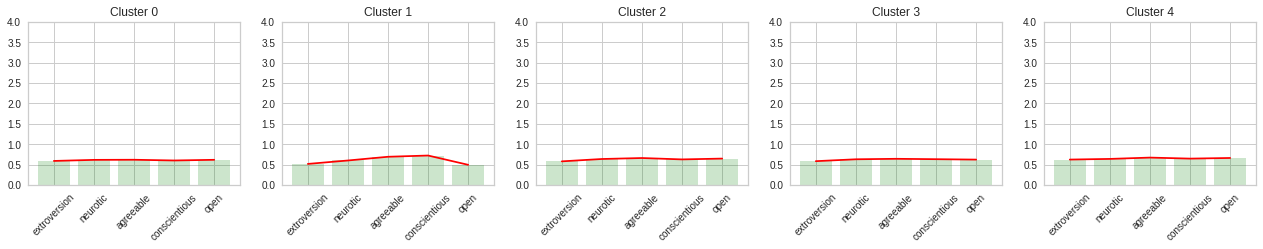

In [32]:
col_list = list(df_kmeans)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_kmeans[ext].sum(axis=1)/10
data_sums['neurotic'] = df_kmeans[est].sum(axis=1)/10
data_sums['agreeable'] = df_kmeans[agr].sum(axis=1)/10
data_sums['conscientious'] = df_kmeans[csn].sum(axis=1)/10
data_sums['open'] = df_kmeans[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

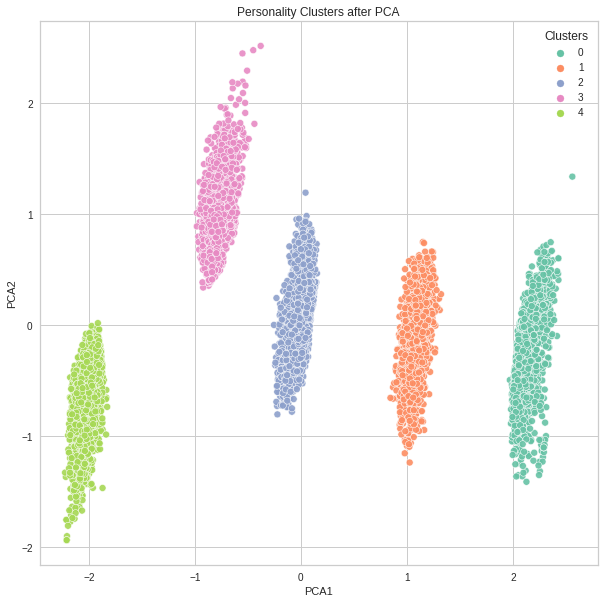

In [34]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_kmeans)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.9)
plt.title('Personality Clusters after PCA');